# Project 3: Pushshift's API WebScrapping for Predicting Comments and Modeling

In [3]:
# importing Necessary Library
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime
import json
import os
from bs4 import BeautifulSoup
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.feature_extraction.text import HashingVectorizer, TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.externals.six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz

#from textblob import TextBlob, Word
# import pydotplus


#  Configure Visual setting 
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.style.use('ggplot')
np.random.seed(42)
sns.set()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline      

## 1 Load the Data
#### Load in the the data of cleaned comments data

In [5]:
# import cleaned comments data from csv
df = pd.read_csv('comments_clean.csv')


### Predicting comments using Random Forests + Another Classifier

In [6]:
df.head()

,body,target
0,you deserve the dad the year award,1
1,layman and found his article exciting but thin...,1
2,mah god the article wa worth just for seeing d...,1
3,learned third year physic that the reason cant...,1
4,the only right and moral approach give unortho...,1


In [7]:
df.shape

(13618, 2)

In [8]:
df.dtypes

body      object
target     int64
dtype: object

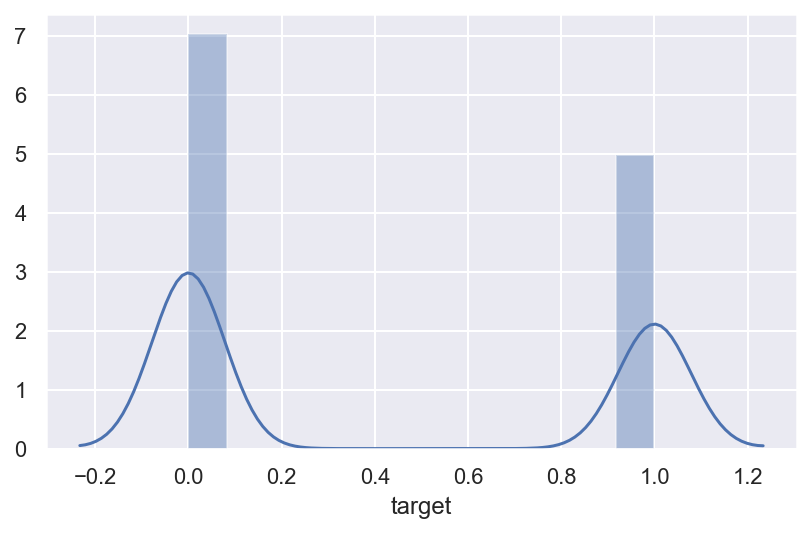

In [9]:
sns.distplot(df['target'], kde = True)

 ### X and y, train/test split

In [10]:
X = df['body']
y = df['target']
y.value_counts(normalize=True)

0    0.585255
1    0.414745
Name: target, dtype: float64

In [11]:
#need to conduct a Train/Test split before creating features
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42)

In [12]:
X_train.shape

(10213,)

In [13]:
y_train.shape

(10213,)

In [14]:
X_test.shape

(3405,)

In [15]:
y_test.shape

(3405,)

In [16]:
# using standard stop words = "english"

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [17]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9281308136688534
test score: 0.801762114537445


In [18]:
lr_1 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_1.columns = ['coef_']
lr_1['abs_coef'] = np.abs(lr_1['coef_'])
lr_1.sort_values(by='abs_coef', ascending=False).head(30)

,coef_,abs_coef
chemistry,-3.715737,3.715737
chemist,-2.727220,2.727220
physic,2.617448,2.617448
chem,-2.559477,2.559477
physicist,2.355113,2.355113
wolfram,2.171870,2.171870
acid,-2.130716,2.130716
feynman,2.042191,2.042191
chemical,-2.008028,2.008028
sodium,-1.991098,1.991098


### Editing stop words

In [19]:
from sklearn.feature_extraction import text

text.ENGLISH_STOP_WORDS

add_stop_words = ['did', 'doe', 'don', 'doesn', 'getting', 'going', 'got', 'ha', 'isn', 'wa']

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

In [20]:
stop_words

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [21]:
# using additional stop words

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [22]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9282287280916479
test score: 0.8011747430249633


In [23]:
lr_2 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_2.columns = ['coef_']
lr_2.sort_values(by='coef_', ascending=False).head(10)


,coef_
physic,2.630928
physicist,2.378314
wolfram,2.178817
feynman,2.004424
dimension,1.928346
laser,1.924570
friction,1.811339
relativity,1.781096
askphysics,1.724129
earth,1.701047


### cvec Random Forest model

In [24]:
# using standard stop words = "english"

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = "english", 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [25]:
pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9843336923528836
test score: 0.7759177679882525


In [26]:
rf_3 = cvec.get_feature_names()
rf_3_imp = rf.feature_importances_

df_rf_1 = pd.DataFrame(data=rf_3_imp, index=rf_3)
df_rf_1.sort_values(by=0, ascending=False).head(10)

,0
physic,0.028496
chemistry,0.014334
acid,0.006690
force,0.006382
lab,0.006071
wolfram,0.006027
theory,0.006006
mechanic,0.005674
water,0.005585
reaction,0.005416


In [27]:
df_rf_1.sort_values(by=0, ascending=False).tail(10)

,0
broadband,0.0
ababa,0.0
posse,0.0
possessing,0.0
aba,0.0
brine,0.0
shaving,0.0
practitioner,0.0
illicit,0.0
electromotive,0.0


In [28]:
# using additional stop words

cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9836482913933222
test score: 0.7723935389133627


In [29]:
rf_3 = cvec.get_feature_names()
rf_3_imp = rf.feature_importances_

df_rf_2 = pd.DataFrame(data=rf_3_imp, index=rf_3)

df_rf_2.columns = ['feature_importances_']
df_rf_2.sort_values(by='feature_importances_', ascending=False).head(10)

,feature_importances_
physic,0.031250
chemistry,0.014645
acid,0.007010
theory,0.006912
water,0.006633
lab,0.006495
force,0.006255
wolfram,0.005745
reaction,0.005310
quantum,0.005228


In [30]:
df_rf_2.sort_values(by='feature_importances_', ascending=False).tail(20)

,feature_importances_
realty,0.0
suspicious,0.0
combust,0.0
facto,0.0
rubberized,0.0
reacharging,0.0
interchange,0.0
accessable,0.0
decaying,0.0
synchronize,0.0


### n-grams

In [31]:
# CountVectorizer & Logistic regression using additional stop words and 1 - 3 n-grams

cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )

lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9319494761578381
test score: 0.7964757709251101


In [32]:
lr_4 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_4.columns = ['coef_']
lr_4['abs_coef'] = np.abs(lr_4['coef_'])
lr_4.sort_values(by='abs_coef', ascending=False).head(20)

,coef_,abs_coef
chemistry,-3.565938,3.565938
physic,2.697789,2.697789
chemist,-2.623221,2.623221
chem,-2.489733,2.489733
physicist,2.342140,2.342140
wolfram,2.167779,2.167779
acid,-2.095241,2.095241
chemical,-2.077498,2.077498
feynman,1.947977,1.947977
dimension,1.944451,1.944451


In [33]:
lr_4.sort_values(by='abs_coef', ascending=False).tail(20)

,coef_,abs_coef
spinning electric field,0.000037,0.000037
sensor measuring,-0.000037,0.000037
principal fibre bundle,0.000037,0.000037
principal fibre,0.000037,0.000037
school strong,0.000037,0.000037
aluminium sulfate,-0.000037,0.000037
deadly drug,-0.000036,0.000036
cunigan said cooker,-0.000036,0.000036
meth maker,-0.000036,0.000036
said cooker,-0.000036,0.000036


In [34]:
# tf-idf & Logistic regression using additional stop words and 1 - 3 n-grams

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 3))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.890335846470185
test score: 0.8052863436123348


In [35]:
lr_tf_2 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_2.columns = ['coef_']
lr_tf_2['abs_coef'] = np.abs(lr_tf_2['coef_'])
lr_tf_2.sort_values(by='abs_coef', ascending=False).head(20)

,coef_,abs_coef
physic,7.692800,7.692800
chemistry,-7.109657,7.109657
lab,-3.931136,3.931136
chemical,-3.863454,3.863454
force,3.788228,3.788228
reaction,-3.748622,3.748622
acid,-3.601425,3.601425
chem,-3.426626,3.426626
wolfram,3.324081,3.324081
theory,3.267145,3.267145


In [36]:
lr_tf_2.sort_values(by='abs_coef', ascending=False).tail(20)

,coef_,abs_coef
leap,0.001461,0.001461
hello,0.001408,0.001408
coordinate,0.001357,0.001357
jpg,0.001318,0.001318
everyday,-0.001205,0.001205
basic topic,0.001193,0.001193
struggling,-0.001169,0.001169
key point,0.001138,0.001138
wild,-0.000781,0.000781
know work,-0.000742,0.000742


In [37]:
# CountVectorizer & Random forest using additional stop words and 1 - 3 n-grams

cvec = CountVectorizer(analyzer = "word", 
                       tokenizer = None, 
                       preprocessor = None,
                       stop_words = stop_words, 
                       max_features = 10000, 
                       ngram_range = (1, 3)
                      )
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9800254577499266
test score: 0.7791483113069017


In [38]:
rf_3 = cvec.get_feature_names()
rf_3_imp = rf.feature_importances_

df_rf_5 = pd.DataFrame(data=rf_3_imp, index=rf_3)



df_rf_5.columns = ['feature_importances_']
df_rf_5.sort_values(by='feature_importances_', ascending=False).head(20)

,feature_importances_
physic,0.030048
chemistry,0.014165
theory,0.007474
acid,0.007026
lab,0.006607
force,0.006585
wolfram,0.006451
water,0.006196
reaction,0.005936
energy,0.005040


In [39]:
df_rf_5.sort_values(by='feature_importances_', ascending=False).tail(20)

,feature_importances_
attracts,0.0
probably aren,0.0
viral,0.0
chaos theory,0.0
light speed light,0.0
gravitational energy,0.0
dissociates,0.0
carry away energy,0.0
light light,0.0
sort hidden variable,0.0


## CountVectorizer vs Tf-idf

In [40]:
# tfidf using "english" stop words, 1-grams

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = "english", 
                     max_features = 10000, 
                     ngram_range = (1, 1))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [41]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.8868109272495839
test score: 0.8032305433186491


In [42]:
lr_tf_1 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_1.columns = ['coef_']
lr_tf_1['abs_coef'] = np.abs(lr_tf_1['coef_'])
lr_tf_1.sort_values(by='abs_coef', ascending=False).head(10)

,coef_,abs_coef
concept,-7.471182,7.471182
people downvoting,7.421904,7.421904
lift ball,-3.961734,3.961734
concentrated peroxide,-3.848055,3.848055
rapidly,-3.746741,3.746741
grateful,3.663536,3.663536
anomaly,-3.631445,3.631445
compute,-3.498014,3.498014
write,3.351442,3.351442
concentration time,-3.283703,3.283703


In [43]:
lr_tf_1.sort_values(by='abs_coef', ascending=False).tail(10)

,coef_,abs_coef
inorganic chemistry,0.000159,0.000159
supply,-0.000151,0.000151
intentionally,-0.000148,0.000148
started,-0.000133,0.000133
differ,0.000083,0.000083
merging stop,-0.000082,0.000082
potassium sodium,0.000082,0.000082
guess,0.000072,0.000072
textbook,0.000045,0.000045
fraction,-0.000041,0.000041


In [44]:
# using additional stop words

tf = TfidfVectorizer(analyzer = "word", 
                     stop_words = stop_words, 
                     max_features = 10000, 
                     ngram_range = (1, 1))

lr = LogisticRegression()

pipe = Pipeline([
    ('tf', tf),
    ('lr', lr)
])

In [45]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.8872025849407618
test score: 0.8035242290748899


In [46]:
lr_tf_2 = pd.DataFrame(data=lr.coef_.T, index=cvec.get_feature_names())
lr_tf_2.columns = ['coef_']
lr_1['abs_coef'] = np.abs(lr_1['coef_'])
lr_tf_2.sort_values(by='coef_', ascending=False).head(10)

,coef_
pentahydrate,7.438933
grasp,3.677757
write,3.361626
totally,3.099215
people actually,3.022168
subcritical,2.690538
electromagnetic behavior,2.671742
master phd,2.656281
prospective,2.631880
like best,2.623005


In [47]:
lr_tf_2.sort_values(by='coef_', ascending=False).tail(10)

,coef_
odor,-2.547972
crazy,-2.803358
store,-2.841759
concept msvuces8ydo,-3.286571
computing,-3.495782
answer question,-3.629707
rank,-3.709118
concentration increase,-3.827602
life come,-3.976963
concept msvuces8ydo basicly,-7.446558


## Logistic regression model

### baseline

In [48]:
# set up pipeline

# initialize
cvec = CountVectorizer(stop_words = stop_words)
lr = LogisticRegression()

pipe = Pipeline([
    ('cvec', cvec),
    ('lr', lr)
])

In [49]:
# baseline Logistic model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9401742876725742
test score: 0.8035242290748899


## gridsearch

In [50]:
%%time

# gridsearchCV tests cross-validation for the parameters
# pipe

params = {
#     'cvec__stop_words': [stop_words], 
    'cvec__max_features': [5000, 10000, 20000], 
#     'cvec__ngram_range': [(1, 1), (1, 2)], 
    'lr__penalty': ['l1', 'l2'], 
    'lr__C': np.logspace(-10, 0, 10)
}
gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solv

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarn

/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarn

CPU times: user 1min 29s, sys: 661 ms, total: 1min 29s
Wall time: 37.8 s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [51]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.8014288277935089
gs.best_params_ {'cvec__max_features': 20000, 'lr__C': 1.0, 'lr__penalty': 'l2'}
gs.score(X_test, y_test) 0.8035242290748899


## Random forest model

### baseline

In [52]:
# set up pipeline

# initialize
cvec = CountVectorizer(analyzer = "word",                        
                         tokenizer = None, 
                         preprocessor = None,
                         stop_words = stop_words, 
                         max_features = 10000)
rf = RandomForestClassifier(random_state = 42)

pipe = Pipeline([
    ('cvec', cvec),
    ('rf', rf)
])

In [53]:
# baseline Random forest

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.9836482913933222
test score: 0.7723935389133627


### Gridsearch

In [ ]:
%%time

# gridsearchCV tests cross-validation for the parameters
# pipe

params = {
#     'cvec__stop_words': [None, 'english'], 
    'cvec__max_features': [5000, 10000, 20000], 
    'cvec__ngram_range': [(1, 1), (1, 2)], 
    'rf__n_estimators': [10, 20, 30],
    'rf__max_depth': [None, 10, 20]
}

gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

## Multinomial Naive Bayes model

#### Baseline

In [54]:
# set up pipeline

# initialize
cvec = CountVectorizer(stop_words = stop_words)
mnb = MultinomialNB()

pipe = Pipeline([
    ('cvec', cvec),
    ('mnb', mnb)
])

In [55]:
# baseline MultinomialNB model

pipe.fit(X_train, y_train)
print('train score:', pipe.score(X_train, y_train))
print('test score:', pipe.score(X_test, y_test))

train score: 0.8901891944606982
test score: 0.8244587478057344


In [56]:
%%time

# gridsearchCV tests cross-validation for the parameters

params = {

    'cvec__max_features': [10000], 
    'cvec__ngram_range': [(1, 1)], 
    'mnb__alpha': [0, 0.25, 0.5, 0.75, 1]
    
}
gs = GridSearchCV(pipe, param_grid=params, cv=3, verbose=1)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/derejeworkneh/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.2s finished


CPU times: user 3.42 s, sys: 28.9 ms, total: 3.45 s
Wall time: 3.45 s


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [57]:
print('gs.best_score_', gs.best_score_)
print('gs.best_params_', gs.best_params_)
print('gs.score(X_test, y_test)', gs.score(X_test, y_test))

gs.best_score_ 0.8201677394187633
gs.best_params_ {'cvec__max_features': 10000, 'cvec__ngram_range': (1, 1), 'mnb__alpha': 0.75}
gs.score(X_test, y_test) 0.820947922761849


In [58]:
!pip install -U git+https://github.com/sloria/TextBlob.git@dev

  Cloning https://github.com/sloria/TextBlob.git (to revision dev) to /private/var/folders/w4/p7qdm2h135n44xh_dvm89q080000gn/T/pip-req-build-3mul4qkw
  Running command git clone -q https://github.com/sloria/TextBlob.git /private/var/folders/w4/p7qdm2h135n44xh_dvm89q080000gn/T/pip-req-build-3mul4qkw
  Created wheel for textblob: filename=textblob-0.15.3-py2.py3-none-any.whl size=631773 sha256=88914820158d9a0f06feb3504ed5dbb4eb7c0995964dbc7e8e60abf56b9f86f2
  Stored in directory: /private/var/folders/w4/p7qdm2h135n44xh_dvm89q080000gn/T/pip-ephem-wheel-cache-gp_04lwa/wheels/9e/f0/91/2efd9a5aa79262cca8cc51c1075b8d703e493a488b26533439
Successfully built textblob
  Attempting uninstall: textblob
    Found existing installation: textblob 0.15.3
    Uninstalling textblob-0.15.3:
      Successfully uninstalled textblob-0.15.3


In [59]:
from textblob import TextBlob, Word

In [60]:
# Define a function that accepts text and returns the polarity.
def detect_sentiment(text):
    return TextBlob(text).sentiment.polarity

In [61]:
%%time
# Create a new DataFrame column for sentiment 
df['sentiment'] = df.body.apply(detect_sentiment)

CPU times: user 5.96 s, sys: 22 ms, total: 5.98 s
Wall time: 5.99 s


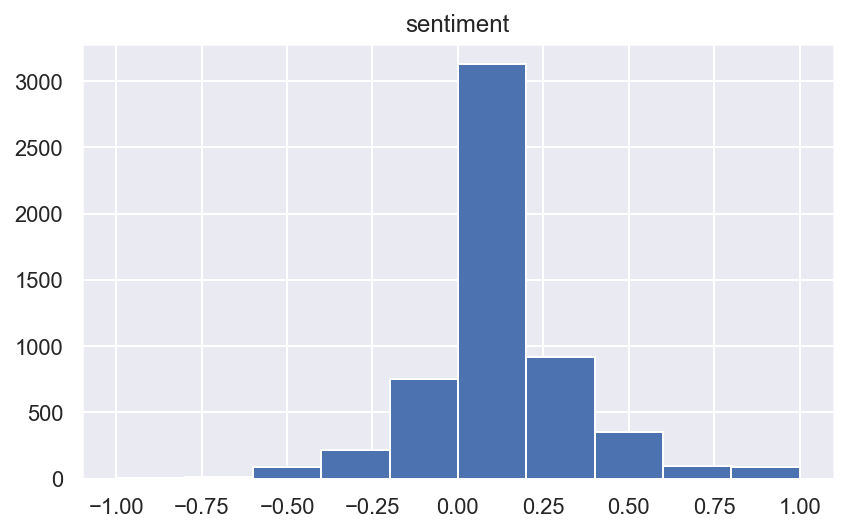

In [62]:
# physics sentiment histogram
df[df['target'] == 1].hist(column='sentiment');

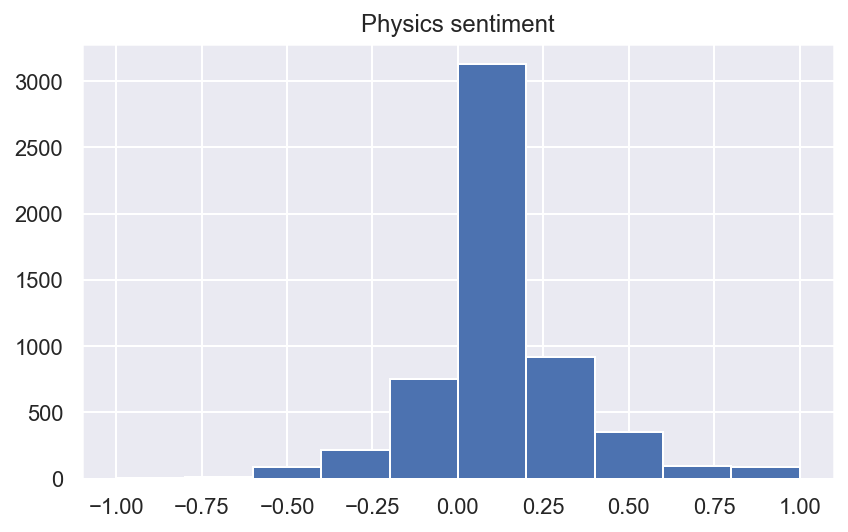

In [63]:
# physicssentiment histogram
physics = df[df['target'] == 1]
plt.hist(physics['sentiment'])
plt.title('Physics sentiment');

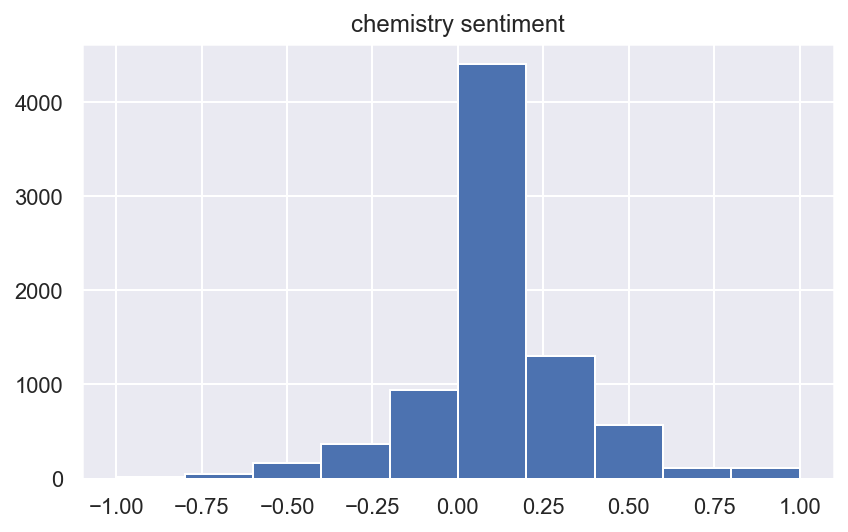

In [64]:
# chemistry sentiment histogram
chemistry = df[df['target'] == 0]
plt.hist(chemistry['sentiment'])
plt.title('chemistry sentiment');

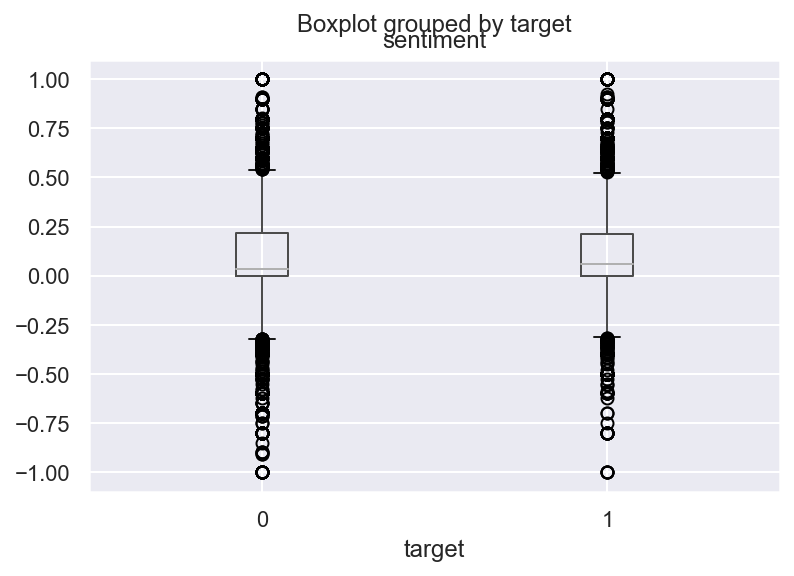

In [65]:
df.boxplot(column='sentiment', by='target');

In [66]:
print('physics mean sentiment:', df[df['target'] == 1].sentiment.mean())
print('chemistry mean sentiment:', df[df['target'] == 0].sentiment.mean())
print('')
print('physics median sentiment:', df[df['target'] == 1].sentiment.median())
print('chemistry median sentiment:', df[df['target'] == 0].sentiment.median())

physics mean sentiment: 0.10733148479205849
chemistry mean sentiment: 0.09727660262988667

physics median sentiment: 0.05735930735930735
chemistry median sentiment: 0.03125
